In [41]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
################################################
%matplotlib inline
################################################

In [42]:
azra = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter05/Datasets/azra_retail_transactions.csv')

In [43]:
azra.head()

InvoiceNo StockCode                          Description  Quantity  \
0     546729     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
1     559898     21868                 POTTING SHED TEA MUG         6   
2     548648     71459       HANGING JAM JAR T-LIGHT HOLDER        24   
3     540543     22173   METAL 4 HOOK HANGER FRENCH CHATEAU         4   
4     561390     20726                   LUNCH BAG WOODLAND        10   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2020-03-16 11:36:00       1.25     18231.0  United Kingdom  
1  2020-07-13 12:18:00       1.25     16225.0  United Kingdom  
2  2020-04-01 13:20:00       0.85     12949.0  United Kingdom  
3  2020-01-09 15:23:00       2.95     14395.0  United Kingdom  
4  2020-07-27 09:52:00       1.65     17068.0  United Kingdom

In [44]:
azra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397884 non-null  int64  
 1   StockCode    397884 non-null  object 
 2   Description  397884 non-null  object 
 3   Quantity     397884 non-null  int64  
 4   InvoiceDate  397884 non-null  object 
 5   UnitPrice    397884 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      397884 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 24.3+ MB


In [45]:
azra.describe()

InvoiceNo       Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000  397884.000000
mean   560616.934451      12.988238       3.116488   15294.423453
std     13106.117773     179.331775      22.097877    1713.141560
min    536365.000000       1.000000       0.001000   12346.000000
25%    549234.000000       2.000000       1.250000   13969.000000
50%    561893.000000       6.000000       1.950000   15159.000000
75%    572090.000000      12.000000       3.750000   16795.000000
max    581587.000000   80995.000000    8142.750000   18287.000000

More concretely, you will be creating the following variables from the
transactions data:  
• revenue_2019 (total revenue for the year 2019)  
• days_since_first_purchase (the number of days since the first purchase
by the customer)  
• days_since_last_purchase (the number of days since the customer's
most recent purchase)  
• number_of_purchases (the total number of purchases by the customer
in 2019)  
• avg_order_cost (the average value of the orders placed by the customer
in 2019)  
• revenue_2020 (the total revenue for the year 2020)  

In [46]:
azra['InvoiceDate'] = pd.to_datetime(azra['InvoiceDate'])

In [47]:
azra['Revenue'] = azra['UnitPrice'] * azra['Quantity']

In [48]:
azra.head()

InvoiceNo StockCode                          Description  Quantity  \
0     546729     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN        12   
1     559898     21868                 POTTING SHED TEA MUG         6   
2     548648     71459       HANGING JAM JAR T-LIGHT HOLDER        24   
3     540543     22173   METAL 4 HOOK HANGER FRENCH CHATEAU         4   
4     561390     20726                   LUNCH BAG WOODLAND        10   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2020-03-16 11:36:00       1.25     18231.0  United Kingdom     15.0  
1 2020-07-13 12:18:00       1.25     16225.0  United Kingdom      7.5  
2 2020-04-01 13:20:00       0.85     12949.0  United Kingdom     20.4  
3 2020-01-09 15:23:00       2.95     14395.0  United Kingdom     11.8  
4 2020-07-27 09:52:00       1.65     17068.0  United Kingdom     16.5

In [49]:
azra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  int64         
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   Revenue      397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 27.3+ MB


In [50]:
map = {'Revenue':'sum',
       'InvoiceDate':'first',
       'CustomerID':'first'}
azra = azra.groupby('InvoiceNo').agg(map)
azra.head()

Revenue         InvoiceDate  CustomerID
InvoiceNo                                         
536365      139.12 2019-12-01 08:26:00     17850.0
536366       22.20 2019-12-01 08:28:00     17850.0
536367      278.73 2019-12-01 08:34:00     13047.0
536368       70.05 2019-12-01 08:34:00     13047.0
536369       17.85 2019-12-01 08:35:00     13047.0

In [51]:
azra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18532 entries, 536365 to 581587
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Revenue      18532 non-null  float64       
 1   InvoiceDate  18532 non-null  datetime64[ns]
 2   CustomerID   18532 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 579.1 KB


In [52]:
azra['Year'] = azra['InvoiceDate'].dt.year
azra['days_since'] = (datetime(year=2019, month=12, day=31) \
                    - azra['InvoiceDate']).apply(lambda x: x.days)

In [53]:
operations = {
    "Revenue":'sum',
    'days_since':['max', 'min', 'nunique']
}
X = azra[azra['Year']==2019].groupby('CustomerID').agg(operations)

In [54]:
X.head()

Revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [55]:
X.columns = [' '.join(col) for col in X.columns.values]

In [56]:
X.head()

Revenue sum  days_since max  days_since min  days_since nunique
CustomerID                                                                 
12347.0          711.79              23              23                   1
12348.0          892.80              14              14                   1
12370.0         1868.02              16              13                   2
12377.0         1001.52              10              10                   1
12383.0          600.72               8               8                   1

In [57]:
X['avg_order_cost'] = X['Revenue sum']/X['days_since nunique']

In [58]:
y = azra[azra['Year'] == 2020].groupby('CustomerID')[['Revenue']].sum()

In [59]:
wrangled_df = pd.concat([X,y], axis=1)

In [60]:
y

Revenue
CustomerID          
12346.0     77183.60
12347.0      3598.21
12348.0       904.44
12349.0      1757.55
12350.0       334.40
...              ...
18280.0       180.60
18281.0        80.82
18282.0       178.05
18283.0      2094.88
18287.0      1837.28

[4219 rows x 1 columns]

In [61]:
wrangled_df
wrangled_df.columns = ['revenue_2019',\
                       'days_since_first_purchase',\
                       'days_since_last_purchase',\
                       'number_of_purchases',\
                       'avg_order_cost',\
                       'revenue_2020']
wrangled_df.head()

revenue_2019  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12346.0              NaN                        NaN                       NaN   
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12349.0              NaN                        NaN                       NaN   
12350.0              NaN                        NaN                       NaN   

            number_of_purchases  avg_order_cost  revenue_2020  
CustomerID                                                     
12346.0                     NaN             NaN      77183.60  
12347.0                     1.0          711.79       3598.21  
12348.0                     1.0          892.80        904.44  
12349.0                     NaN             NaN       1757.55  
12350.0                     NaN             NaN        334.40

In [62]:
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

In [63]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 766 entries, 12347.0 to 18260.0
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   revenue_2019               766 non-null    float64
 1   days_since_first_purchase  766 non-null    float64
 2   days_since_last_purchase   766 non-null    float64
 3   number_of_purchases        766 non-null    float64
 4   avg_order_cost             766 non-null    float64
 5   revenue_2020               766 non-null    float64
dtypes: float64(6)
memory usage: 41.9 KB


In [64]:
# As a final data-cleaning step, it's often a good idea to get rid of outliers. A
# standard definition is that an outlier is any data point more than three standard
# deviations above the median. Use this criterion to drop customers that are
# outliers in terms of 2019 or 2020 revenue:
wrangled_df = wrangled_df[wrangled_df.revenue_2020 < ((wrangled_df.revenue_2020.median()) + wrangled_df.revenue_2020.std()*3) ]

wrangled_df = wrangled_df[wrangled_df.revenue_2019 < ((wrangled_df.revenue_2019.median()) + wrangled_df.revenue_2019.std()*3) ]

In [68]:
# wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df

revenue_2019  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   
...                  ...                        ...                       ...   
18229.0           653.20                       29.0                      22.0   
18239.0           438.10                       28.0                      28.0   
18245.0           365.73                       11.0                      11.0   
18259.0           376.30                       22.0                      22.0   
18260.0           230.70                       14.0                      14.0   

            number_of_purchases  avg_order_cost  revenue_2020  
CustomerID                                                     
12347.0                     1.0          711.79       3598.21  
12348.0                     1.0          892.80        904.44  
12370.0                     2.0          934.01       1677.67  
12377.0                     1.0         1001.52        626.60  
12383.0                     1.0          600.72       1249.84  
...                         ...             ...           ...  
18229.0                     2.0          326.60       6623.70  
18239.0                     1.0          438.10       1123.51  
18245.0                     1.0          365.73       2201.33  
18259.0                     1.0          376.30       1962.30  
18260.0                     1.0          230.70       2412.50  

[738 rows x 6 columns]

In [71]:
wrangled_df.index.nunique()

738

In [72]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

In [73]:
df

revenue_2019  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   
...                  ...                        ...                       ...   
18229.0           653.20                       29.0                      22.0   
18239.0           438.10                       28.0                      28.0   
18245.0           365.73                       11.0                      11.0   
18259.0           376.30                       22.0                      22.0   
18260.0           230.70                       14.0                      14.0   

            number_of_purchases  avg_order_cost  revenue_2020  
CustomerID                                                     
12347.0                     1.0          711.79       3598.21  
12348.0                     1.0          892.80        904.44  
12370.0                     2.0          934.01       1677.67  
12377.0                     1.0         1001.52        626.60  
12383.0                     1.0          600.72       1249.84  
...                         ...             ...           ...  
18229.0                     2.0          326.60       6623.70  
18239.0                     1.0          438.10       1123.51  
18245.0                     1.0          365.73       2201.33  
18259.0                     1.0          376.30       1962.30  
18260.0                     1.0          230.70       2412.50  

[738 rows x 6 columns]

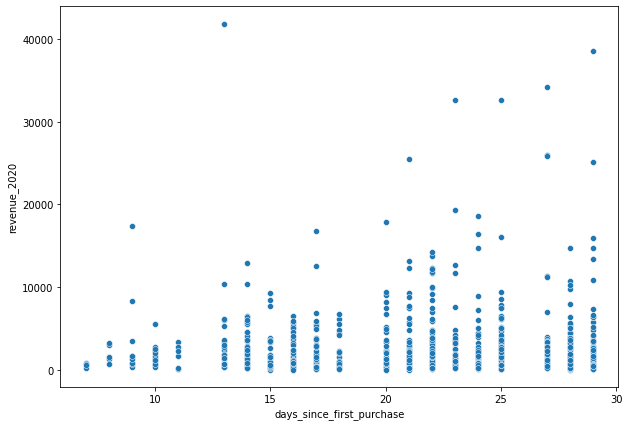

In [76]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=wrangled_df, x='days_since_first_purchase', y='revenue_2020')
plt.show()

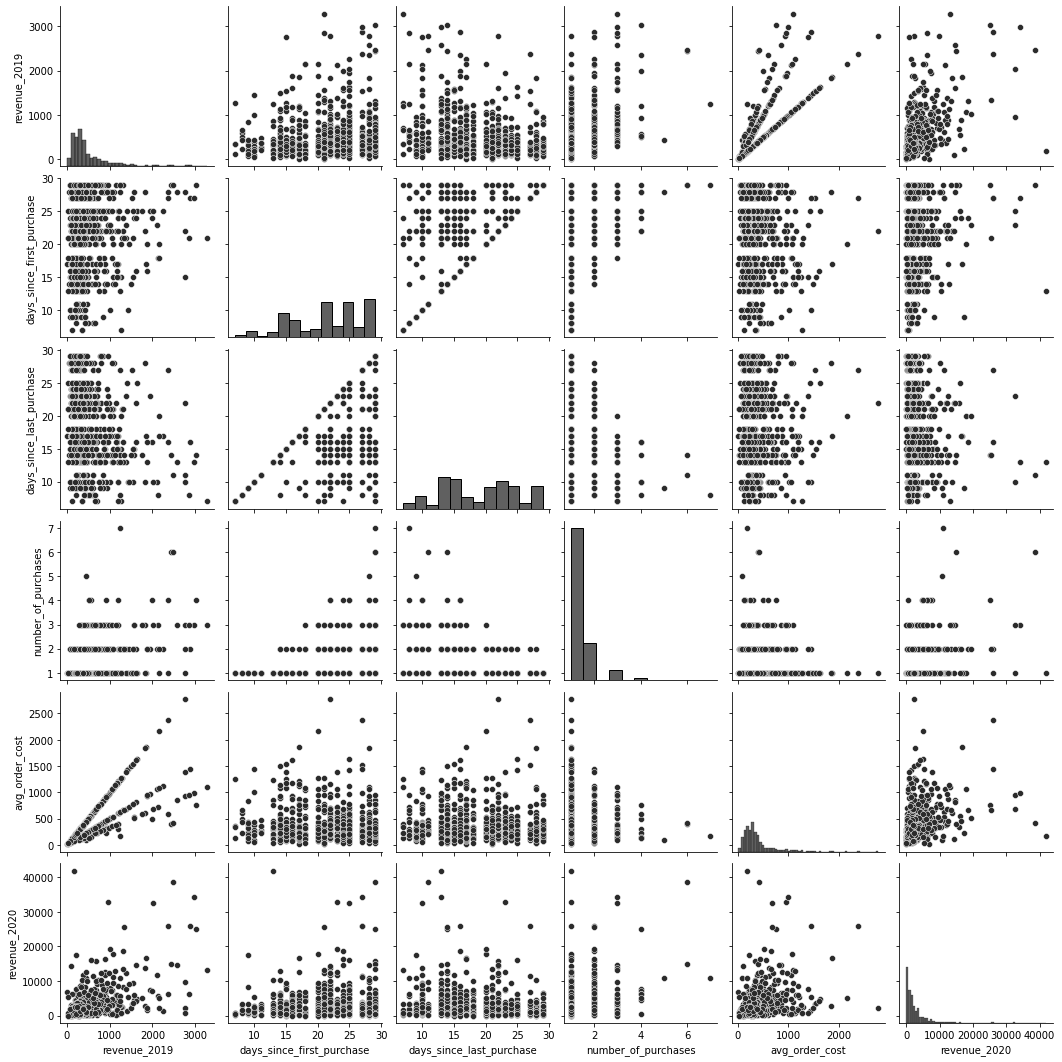

In [77]:
# creating a pair plot from seaborn
sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

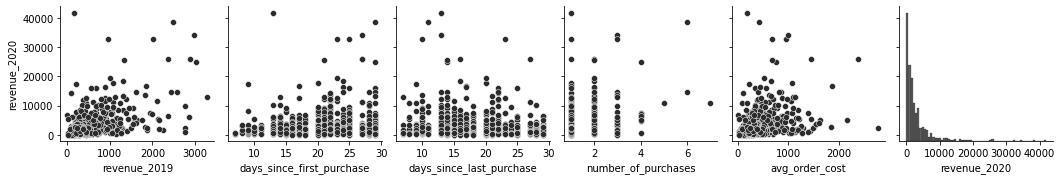

In [78]:
# Using the pairplot function and the y_vars parameter, limit the view to the
# row for your target variable, that is, revenue_2020:
sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")

In [79]:
df.corr()

revenue_2019  days_since_first_purchase  \
revenue_2019                   1.000000                   0.109692   
days_since_first_purchase      0.109692                   1.000000   
days_since_last_purchase      -0.254964                   0.641574   
number_of_purchases            0.504438                   0.327502   
avg_order_cost                 0.779401                  -0.074321   
revenue_2020                   0.548234                   0.061743   

                           days_since_last_purchase  number_of_purchases  \
revenue_2019                              -0.254964             0.504438   
days_since_first_purchase                  0.641574             0.327502   
days_since_last_purchase                   1.000000            -0.398268   
number_of_purchases                       -0.398268             1.000000   
avg_order_cost                            -0.054051            -0.012466   
revenue_2020                              -0.171294             0.355751   

                           avg_order_cost  revenue_2020  
revenue_2019                     0.779401      0.548234  
days_since_first_purchase       -0.074321      0.061743  
days_since_last_purchase        -0.054051     -0.171294  
number_of_purchases             -0.012466      0.355751  
avg_order_cost                   1.000000      0.357384  
revenue_2020                     0.357384      1.000000

In [80]:
df

revenue_2019  days_since_first_purchase  days_since_last_purchase  \
CustomerID                                                                      
12347.0           711.79                       23.0                      23.0   
12348.0           892.80                       14.0                      14.0   
12370.0          1868.02                       16.0                      13.0   
12377.0          1001.52                       10.0                      10.0   
12383.0           600.72                        8.0                       8.0   
...                  ...                        ...                       ...   
18229.0           653.20                       29.0                      22.0   
18239.0           438.10                       28.0                      28.0   
18245.0           365.73                       11.0                      11.0   
18259.0           376.30                       22.0                      22.0   
18260.0           230.70                       14.0                      14.0   

            number_of_purchases  avg_order_cost  revenue_2020  
CustomerID                                                     
12347.0                     1.0          711.79       3598.21  
12348.0                     1.0          892.80        904.44  
12370.0                     2.0          934.01       1677.67  
12377.0                     1.0         1001.52        626.60  
12383.0                     1.0          600.72       1249.84  
...                         ...             ...           ...  
18229.0                     2.0          326.60       6623.70  
18239.0                     1.0          438.10       1123.51  
18245.0                     1.0          365.73       2201.33  
18259.0                     1.0          376.30       1962.30  
18260.0                     1.0          230.70       2412.50  

[738 rows x 6 columns]

In [81]:
X = df[['revenue_2019',\
 'days_since_last_purchase',\
 'number_of_purchases',\
 'avg_order_cost']]
y = df['revenue_2020']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [88]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [89]:
single_customer = pd.DataFrame({'revenue_2019': [1000],\
 'days_since_last_purchase': [20],\
'number_of_purchases': [2],\
                                'avg_order_cost': [500]})
model.predict(single_customer)


array([5847.67624446])

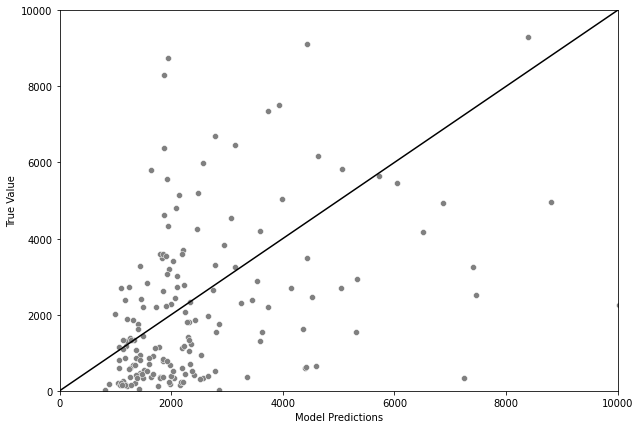

In [91]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=model.predict(X_test),y=y_test,  color='gray')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()